In [66]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import main

In [67]:
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(1, 64)
#         self.fc2 = nn.Linear(64, 64)
#         self.fc3 = nn.Linear(64, new_dataset.num_points) 

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         return x

In [68]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, main.new_dataset.num_points)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)


In [69]:
model = torch.load('model.pth', weights_only=False)

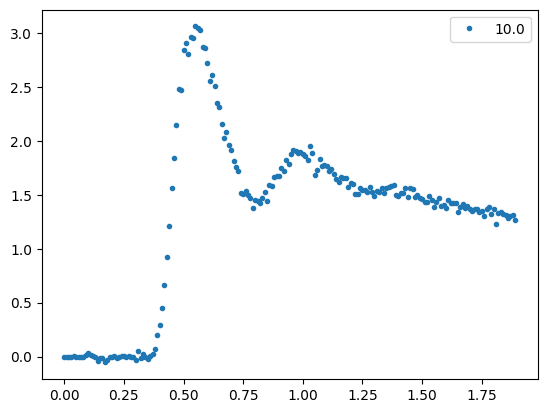

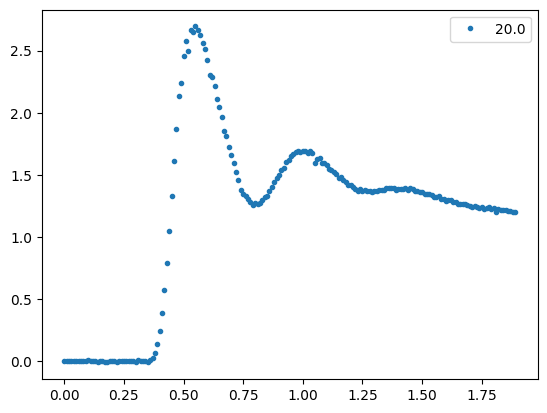

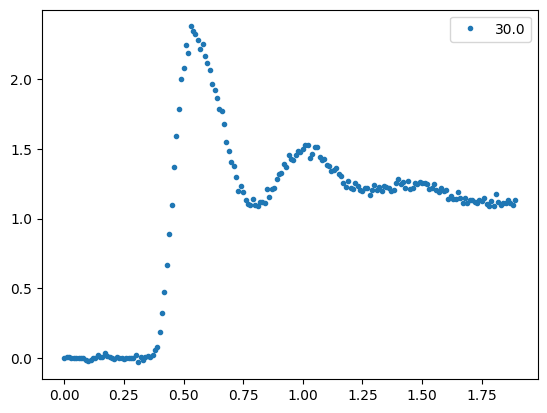

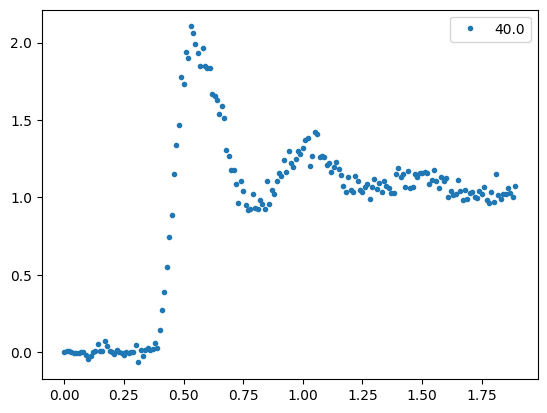

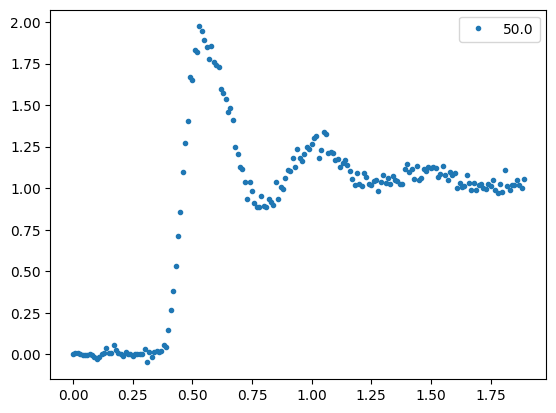

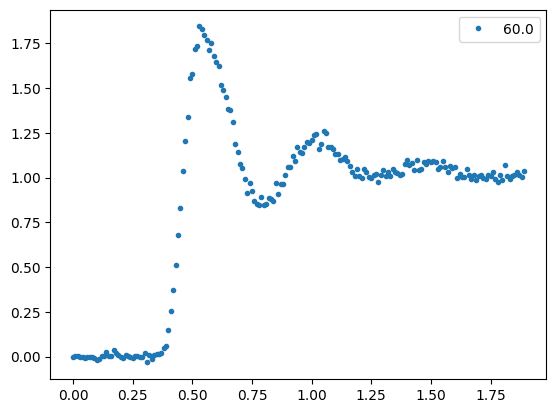

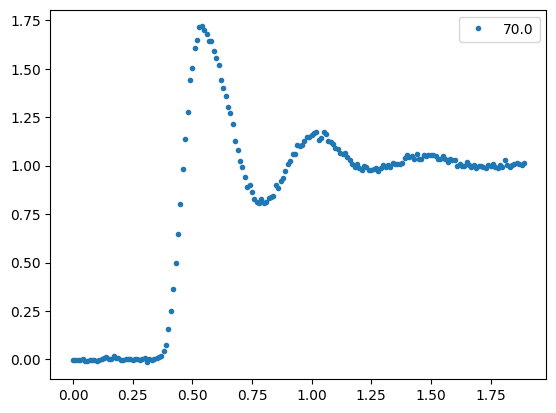

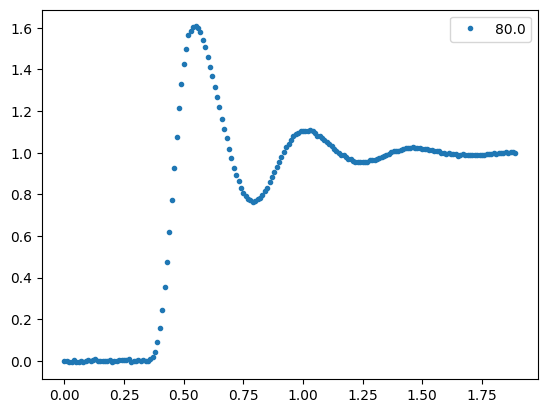

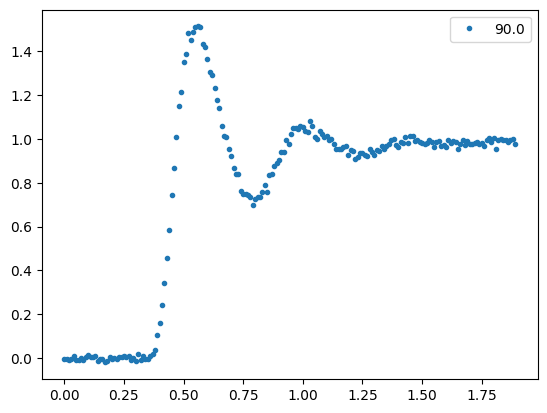

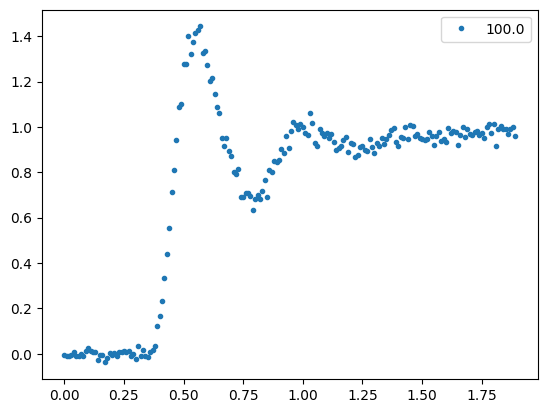

In [70]:
model.eval()
#fig, axes = plt.subplots(5)

with torch.no_grad():
    count = 0
    for i in range(10):
        X = torch.tensor([main.new_dataset.data[i,0]]).to(main.device)
        pred = model(X).cpu()
        plt.plot(main.new_dataset.r_values, pred, "o", ms = 3, label = f"{X.item()}")
        count += 1
        plt.legend()
        plt.show()